### Tang Quoc Hung - 19521583
Link Github: https://github.com/tangquochung/Data_Mining_Lab/tree/main/Lab4

# Lab 4 - Statistical Data Analytics

## I. Classification 

In [1]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset: digits
digits = datasets.load_digits()

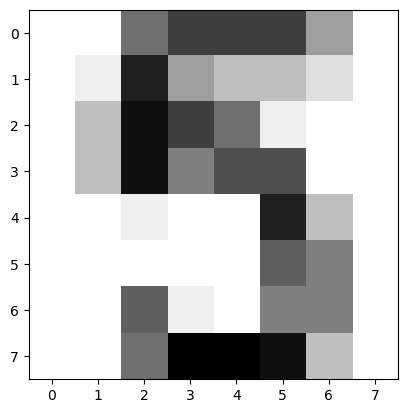

In [2]:
#Display image 1010
plt.imshow(digits.images[1010], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify =y)

In [4]:
#Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

#Create a R-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifier to the training data
knn.fit(X_train, y_train)

#Print the accuracy
print("Accuracy: (0)".format(knn.score(X_test, y_test)))

Accuracy: (0)


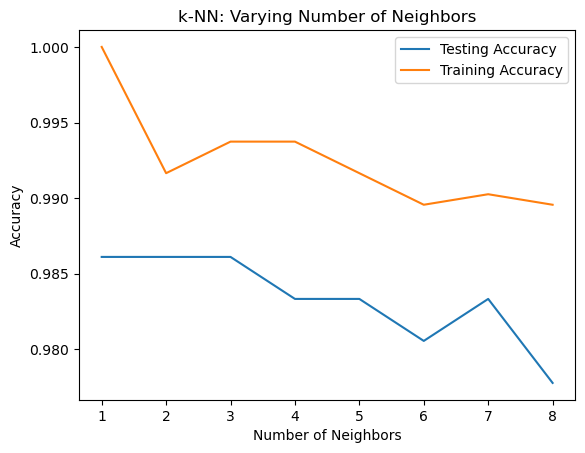

In [5]:
#Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over different values of R
for i, k in enumerate(neighbors):
    #Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot (neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot (neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt .xlabel( 'Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [6]:
pip install -U future

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [8]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [9]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

In [10]:
print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x1F2339A1190>, 5)


C:\Users\Asus\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


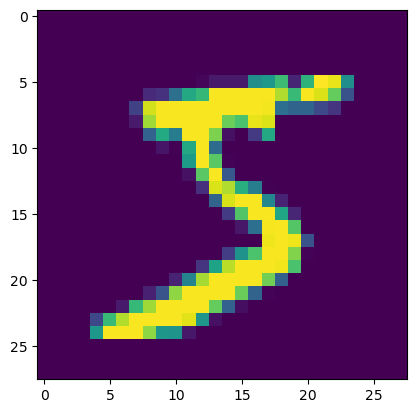

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [12]:
class Net (nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
        
    def forward(self, x):
        x = x.view([-1,28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [13]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=False, transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [14]:
def train():
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)
            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch_idx % 100 == 0:
                print('Epoch = %f. Batch = %s, Loss = %s' % (epoch, batch_idx, loss.item()))
    return net

In [15]:
net = train()

Epoch = 0.000000. Batch = 0, Loss = 2.314314126968384
Epoch = 0.000000. Batch = 100, Loss = 0.8269017338752747
Epoch = 0.000000. Batch = 200, Loss = 0.7776373028755188
Epoch = 0.000000. Batch = 300, Loss = 0.6045940518379211
Epoch = 0.000000. Batch = 400, Loss = 0.5274799466133118
Epoch = 0.000000. Batch = 500, Loss = 0.4374728798866272
Epoch = 0.000000. Batch = 600, Loss = 0.3972519040107727
Epoch = 0.000000. Batch = 700, Loss = 0.4175431430339813
Epoch = 0.000000. Batch = 800, Loss = 0.32260558009147644
Epoch = 0.000000. Batch = 900, Loss = 0.3881262540817261
Epoch = 1.000000. Batch = 0, Loss = 0.4684298634529114
Epoch = 1.000000. Batch = 100, Loss = 0.3716326355934143
Epoch = 1.000000. Batch = 200, Loss = 0.22236327826976776
Epoch = 1.000000. Batch = 300, Loss = 0.37154778838157654
Epoch = 1.000000. Batch = 400, Loss = 0.2738587558269501
Epoch = 1.000000. Batch = 500, Loss = 0.46656128764152527
Epoch = 1.000000. Batch = 600, Loss = 0.2690927982330322
Epoch = 1.000000. Batch = 700, L

In [16]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Perventage accuracy", correct.item()*100/10000.)

Correct out of 10000 9207
Perventage accuracy 92.07


## II. Linear Regression

In [17]:
#Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Read the CSV file into a DataFram: df
df = pd.read_csv('gapminder.csv')

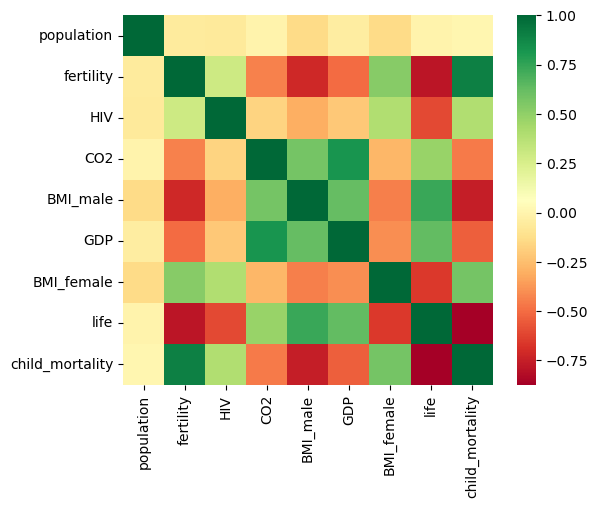

In [18]:
ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

0.6162438752151919


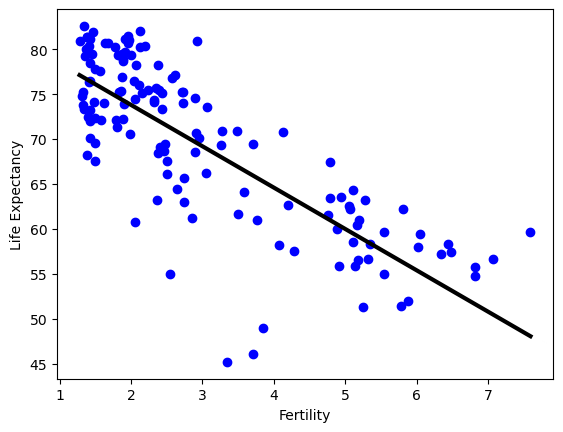

In [19]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

K_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(K_fertility), max(K_fertility)).reshape(-1,1)

#Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(K_fertility, y_life, test_size=0.3, random_state=42)

#Create the regression model: reg_all
reg = LinearRegression()

#Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

#Print accuracy
print(reg.score(K_fertility, y_life))

#Plot regression Line
plt.scatter(K_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color='black', linewidth=3)
plt.ylabel("Life Expectancy")
plt.xlabel('Fertility')
plt.show()


In [20]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')

del features['life']

del features['Region']

y_life = df['life'].values.reshape(-1,1)

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

# Create the regression model: reg_all
reg_all = LinearRegression()
# Fit the regression to the training data
reg_all.fit(x_train, y_train)

# Print accuracy
print(reg_all.score(features, y_life))

0.8914651485793136


### Linear Regression using PyTorch

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

TypeError: unsupported operand type(s) for &: 'str' and 'int'

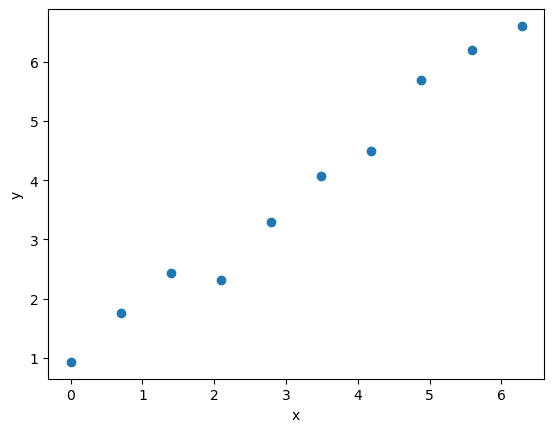

In [22]:
N = 10 # number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' & N)
plt.show()

In [23]:
import torch

### Dataset

In [24]:
from torch.utils.data import Dataset
class MyDataset (Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1,self.x[idx]]),
            'label': torch.tensor([self.y[idx]])}
        return sample

In [25]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([0.9330], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.7546], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.4379], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.3185], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.2958], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.0760], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.4881], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.6889], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([6.1921], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.6038], dtype=torch.float64)


### Dataloader

In [26]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [27]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = $s' % i_batch)
    print('samples: ')
    pp.pprint(samples)

RuntimeError: DataLoader worker (pid(s) 13052, 21736, 30660, 11876) exited unexpectedly

### Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel (nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

### Setting a model for our problem

In [ ]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

### Cost function

In [ ]:
cost = nn.MSELoss()

### Minimizing the cost function

In [ ]:
num_epochs = 10 # How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = Dataloader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print ('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'])
        error = cost(predictions, samples['label'])
        print ('\tBatch = %s, Error = %s' % (batch_i, error.item()))

In [ ]:
# Before the backward pass, use the optimizer object to zero all of the
# gradients for the variables it will update (which are the learnable
# weights of the model). This is because by default, gradients are
# accumulated in buffers( i.e, not overwritten) whenever .backward()
# is called. Checkout docs of torch.autograd.backward for more details.
optimiser.zero_grad()

# Backward pass: compute gradient of the loss with respect to model
# parameters
error.backward()

# Calling the step function on an Optimizer makes an update to its
# parameters
optimiser.step()

### Lets see how well the model has learnt the data

In [ ]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_ plotting shape:', y_for_plotting.shape)

In [ ]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

## III. Recommendation Systems

In [29]:
def user_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,3]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_users[i])
    return pred

In [32]:
def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,:] - avg_ratings)) / sum(sim_items[j])
    return pred

In [36]:
evaluateRS(M, M_result, 'user_cf', 'cosine')
evaluateRS(M, M_result, 'user_cf', 'correlation')
evaluateRS(M, M_result, 'item_cf', 'cosine')
evaluateRS(M, M_result, 'item_cf', 'cerrelation')

NameError: name 'evaluateRS' is not defined

In [37]:
results = []
for method in ['user_cf', 'item _cf']:
    for metric in ['cosine', 'correlation']:
            rank_acc = evaluate_rank(M, M_result, method, metric)
            results += ["Rank accuracy of {0} with {1} metric: {2}".format(method[1], metric, rank_acc)]
print("\n".join(results))

NameError: name 'evaluate_rank' is not defined